# Explore reasons for delay

In [2]:
dataset_meta = DatasetMeta(SchemaName.FLIGHTS, FlightsDatasetName.DATASET2)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
65,65,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
71,71,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
104,104,B6,BOS,BWI,727,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
108,108,DL,BOS,DTW,2079,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
121,121,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1


In [3]:
actions_lst = [
        GroupAction(grouped_column=Column('delay_reason'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
        BackAction(),
        FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
             filter_term='None'),
        GroupAction(grouped_column=Column('scheduled_trip_time'), aggregated_column=Column('flight_id'),
                aggregation_function=AggregationFunction.COUNT),
        BackAction(),
        BackAction(),
        FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
                 filter_term='AIR_SYSTEM'),
        GroupAction(grouped_column=Column('scheduled_departure'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
        BackAction(),
        BackAction(),
        FilterAction(filtered_column=Column('delay_reason'), filter_operator=FilterOperator.EQUAL,
             filter_term='SECURITY'),
        GroupAction(grouped_column=Column('scheduled_trip_time'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

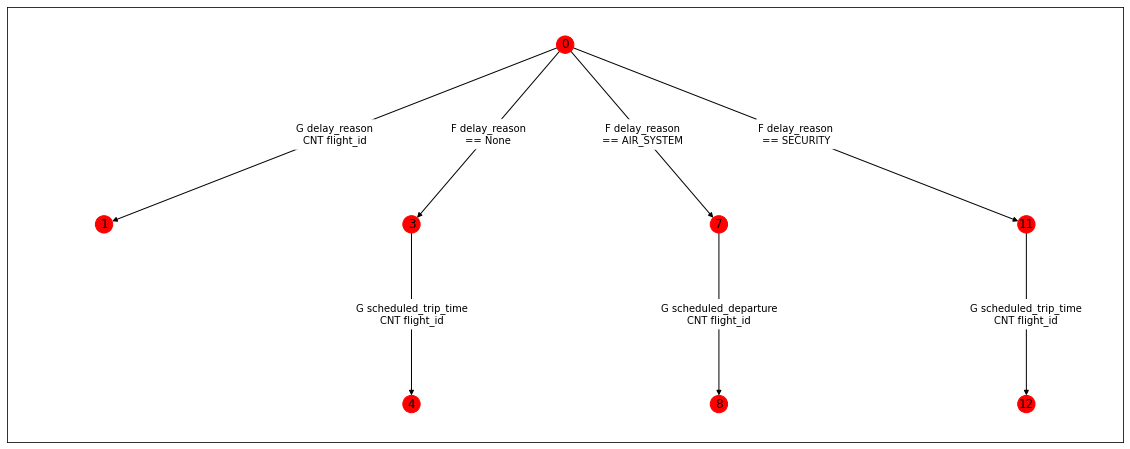

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by delay_reason CNT(flight_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,flight_id
delay_reason,
None,6233
AIR_SYSTEM,908
LATE_AIRCRAFT,485
AIRLINE,449
WEATHER,96
SECURITY,1


### Query 3: <span style="color:blue;">Filter delay_reason == None</span>

In [6]:
display(prepare_display(action_execution_result_lst, 2))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
65,65,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
71,71,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
104,104,B6,BOS,BWI,727,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
108,108,DL,BOS,DTW,2079,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
121,121,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469120,469120,B6,BOS,RIC,381,None,ON_TIME,MID_FLIGHT,EVENING,EVENING,6,31,2
469154,469154,B6,BOS,SFO,833,None,ON_TIME,LONG_FLIGHT,EVENING,EVENING,6,31,2
469326,469326,B6,BOS,JFK,317,None,ON_TIME,SHORT_FLIGHT,EVENING,EVENING,6,31,2
469445,469445,B6,BOS,MCO,1451,None,ON_TIME,LONG_FLIGHT,EVENING,EVENING,6,31,2


### Query 4: <span style="color:DimGray">Filter delay_reason == None AND</span> <span style="color:blue;">Group by scheduled_trip_time CNT(flight_id)</span>

In [7]:
display(prepare_display(action_execution_result_lst, 3))

,flight_id
scheduled_trip_time,
LONG_FLIGHT,2847
MID_FLIGHT,2471
SHORT_FLIGHT,915


### Query 7: <span style="color:blue;">Filter delay_reason == AIR_SYSTEM</span>

In [8]:
display(prepare_display(action_execution_result_lst, 6))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
1866,1866,B6,BOS,DEN,493,AIR_SYSTEM,ON_TIME,LONG_FLIGHT,MORNING,MORNING,4,1,1
2293,2293,UA,BOS,DEN,339,AIR_SYSTEM,ON_TIME,LONG_FLIGHT,MORNING,MORNING,4,1,1
2814,2814,AA,BOS,DFW,1027,AIR_SYSTEM,ON_TIME,LONG_FLIGHT,MORNING,AFTERNOON,4,1,1
4011,4011,B6,BOS,SEA,597,AIR_SYSTEM,LARGE_DELAY,LONG_FLIGHT,MORNING,AFTERNOON,4,1,1
4799,4799,AA,BOS,DFW,1186,AIR_SYSTEM,ON_TIME,LONG_FLIGHT,MORNING,AFTERNOON,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460972,460972,UA,BOS,ORD,1135,AIR_SYSTEM,ON_TIME,MID_FLIGHT,MORNING,MORNING,6,31,2
461342,461342,B6,BOS,EWR,2379,AIR_SYSTEM,ON_TIME,SHORT_FLIGHT,MORNING,MORNING,6,31,2
467220,467220,AA,BOS,ORD,1065,AIR_SYSTEM,ON_TIME,MID_FLIGHT,AFTERNOON,EVENING,6,31,2
467490,467490,NK,BOS,FLL,615,AIR_SYSTEM,MID_DELAY,LONG_FLIGHT,AFTERNOON,EVENING,6,31,2


### Query 8: <span style="color:DimGray">Filter delay_reason == AIR_SYSTEM AND</span> <span style="color:blue;">Group by scheduled_departure CNT(flight_id)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,flight_id
scheduled_departure,
MORNING,404
AFTERNOON,334
EVENING,150
NIGHT,20


### Query 11: <span style="color:blue;">Filter delay_reason == SECURITY</span>

In [10]:
display(prepare_display(action_execution_result_lst, 10))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
227848,227848,B6,BOS,PHX,603,SECURITY,SMALL_DELAY,LONG_FLIGHT,AFTERNOON,EVENING,4,15,8


### Query 12: <span style="color:DimGray">Filter delay_reason == SECURITY AND</span> <span style="color:blue;">Group by scheduled_trip_time CNT(flight_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 11))

,flight_id
scheduled_trip_time,
LONG_FLIGHT,1
